### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read CSV file

In [2]:
ted=pd.read_csv('https://raw.githubusercontent.com/sayedul79/python-data-science-code/main/data/ted_main.csv')

In [3]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
ted.shape

(2550, 17)

In [5]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

### Check null values in DataFrame

In [6]:
ted.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

### `dtype` in DataFrame

In [7]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [8]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

### Fill the null values

In [9]:
ted.speaker_occupation.mode()

0    Writer
dtype: object

In [10]:
ted.speaker_occupation.mode()[0]

'Writer'

In [11]:
ted['speaker_occupation'] = ted.speaker_occupation.fillna(
    ted.speaker_occupation.mode()[0])

In [12]:
ted.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

So there is no missing value

### Descriptive analysis

In [13]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


# Exploratory data analysis

In [14]:
ted.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


<AxesSubplot:>

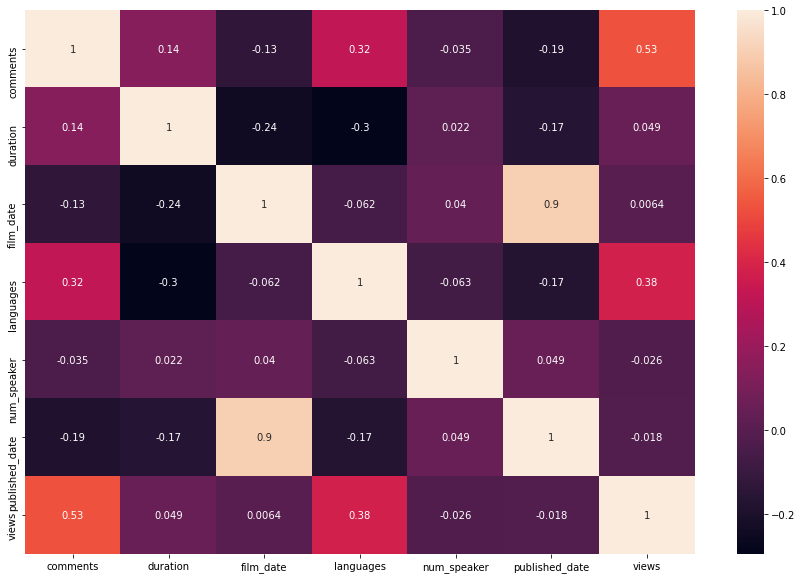

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(ted.corr(), annot=True)

From the heatmap, the number of views correlates well with language and comments.

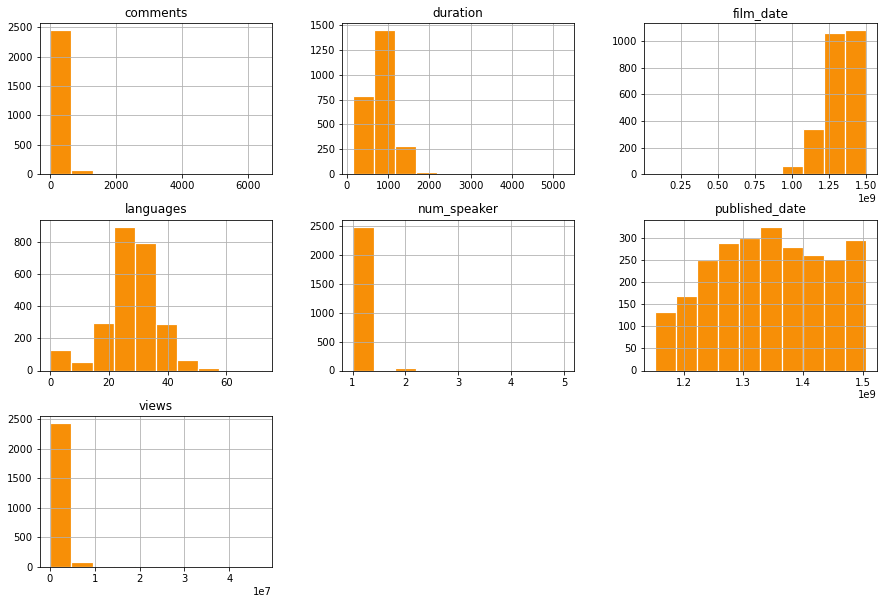

In [16]:
ted.hist(color='#f78f07',edgecolor="white", linewidth=1.2, 
         figsize=(15, 10));

In [17]:
ted.main_speaker.value_counts()

Hans Rosling         9
Juan Enriquez        7
Rives                6
Marco Tempest        6
Julian Treasure      5
                    ..
Shah Rukh Khan       1
Simon Berrow         1
Edward Tenner        1
Cynthia Schneider    1
Zahra' Langhi        1
Name: main_speaker, Length: 2156, dtype: int64

<AxesSubplot:>

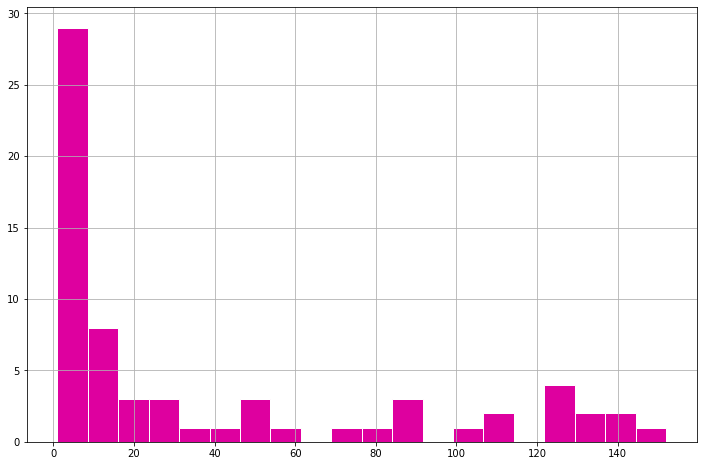

In [18]:
plt.figure(figsize=(12, 8))
ted.languages.value_counts().hist(bins=20, color='#de009f',
                                  edgecolor='white')

### Most commented TED talk

In [19]:
max_comments=ted.sort_values('comments')[['views','title',
                                          'comments']].tail(10)
max_comments

,views,title,comments
677,34309432,How great leaders inspire action,1930
661,1838628,The danger of science denial,2272
1346,43155405,Your body language may shape who you are,2290
840,1847256,On reading the Koran,2374
954,1832930,Taking imagination seriously,2492
1787,2162764,How do you explain consciousness?,2673
201,21190883,My stroke of insight,2877
644,3433437,Science can answer moral questions,3356
0,47227110,Do schools kill creativity?,4553
96,4374792,Militant atheism,6404


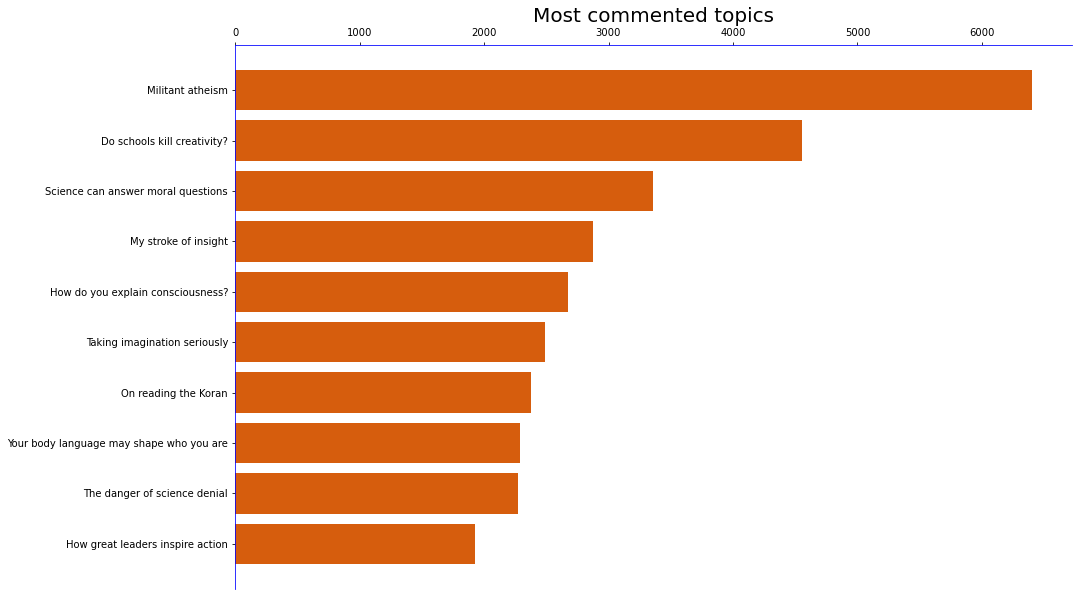

In [20]:
fig, ax=plt.subplots(figsize=(15,10))
ax.barh(max_comments.title, max_comments.comments, color='#d65d0d')
ax.set_title('Most commented topics', fontdict={'fontsize':20,
                                               'fontweight':'medium'})

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.spines['left'].set_color('blue')
ax.spines['top'].set_color('blue')

In [21]:
# make this more interpretable by inverting the calculation
ted['views_per_comment'] = ted.views / ted.comments
normalise_view=ted.sort_values('views_per_comment')[
    ['views_per_comment', 'title']].tail(10)
normalise_view

,views_per_comment,title
2273,124170.282609,The agony of trying to unsubscribe
2392,126756.166667,"Smelfies, and other experiments in synthetic b..."
2407,128146.800000,"""Turceasca"""
2114,136506.480000,This is what happens when you reply to spam email
2313,136715.833333,"""St. James Infirmary Blues"""
2494,143643.714286,A simple new blood test that can catch cancer ...
2528,179735.666667,How your pictures can help reclaim lost history
2542,180696.000000,Living sculptures that stand for history's truths
2501,279680.000000,The stories behind The New Yorker's iconic covers
2534,323087.000000,What it feels like to see Earth from space


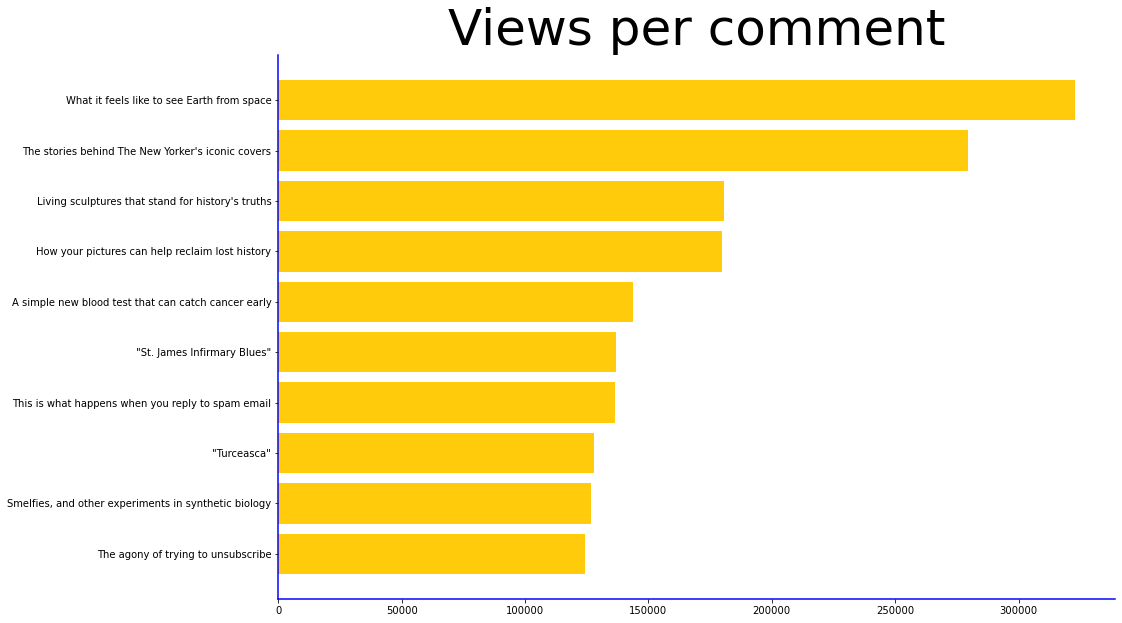

In [22]:
fig, ax=plt.subplots(figsize=(15,10))
ax.barh(normalise_view.title, normalise_view.views_per_comment,
        color='#FFCB0B')
ax.set_title('Views per comment', fontdict={'fontsize':50,
                            'fontweight':'medium'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('blue')
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

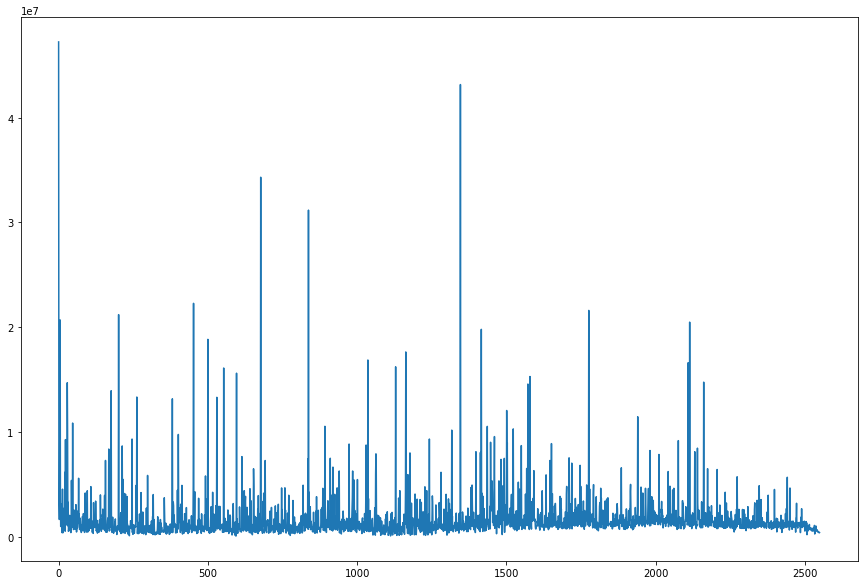

In [23]:
fig, ax=plt.subplots(figsize=(15,10))
ax.plot(list(ted.index), list(ted.views))

### Views per year

In [24]:
ted.published_date.head()

0    1151367060
1    1151367060
2    1151367060
3    1151367060
4    1151440680
Name: published_date, dtype: int64

In [25]:
# results don't look right
pd.to_datetime(ted.published_date).head()

0   1970-01-01 00:00:01.151367060
1   1970-01-01 00:00:01.151367060
2   1970-01-01 00:00:01.151367060
3   1970-01-01 00:00:01.151367060
4   1970-01-01 00:00:01.151440680
Name: published_date, dtype: datetime64[ns]

In [26]:
# now the results look right
pd.to_datetime(ted.published_date, unit='s').head()

0   2006-06-27 00:11:00
1   2006-06-27 00:11:00
2   2006-06-27 00:11:00
3   2006-06-27 00:11:00
4   2006-06-27 20:38:00
Name: published_date, dtype: datetime64[ns]

In [27]:
ted['published_date']=pd.to_datetime(ted.published_date, unit='s')
ted.loc[:4, ['num_speaker', 'published_date',
       'ratings']]

,num_speaker,published_date,ratings
0,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."


Text(0.5, 1.0, 'Views per year')

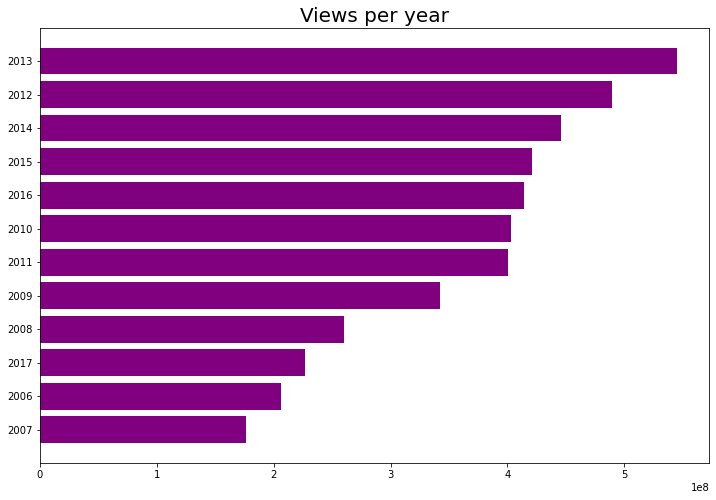

In [28]:
fig, ax=plt.subplots(figsize=(12,8))
year_view=ted.groupby(ted.published_date.dt.strftime('%Y'))[
    'views'].sum().sort_values()
ax.barh(year_view.index, year_view, color='purple')
ax.set_title('Views per year', fontdict={'fontsize':20,
                                    'fontweight':'medium'})

(array([2.448e+03, 7.900e+01, 1.200e+01, 6.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.0000e+00, 6.4220e+02, 1.2824e+03, 1.9226e+03, 2.5628e+03,
        3.2030e+03, 3.8432e+03, 4.4834e+03, 5.1236e+03, 5.7638e+03,
        6.4040e+03]),
 <BarContainer object of 10 artists>)

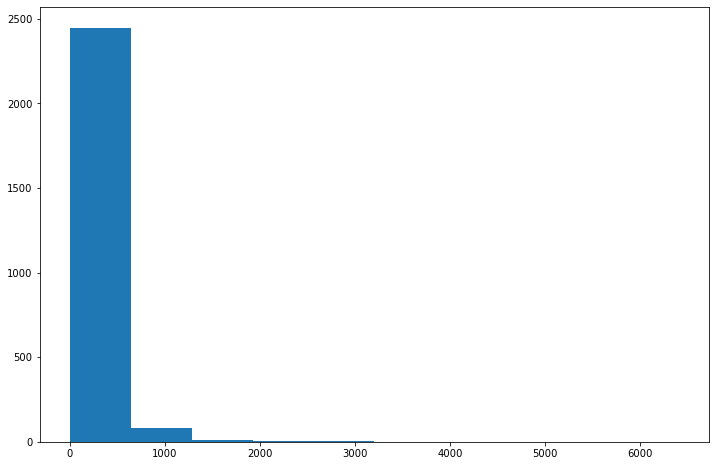

In [29]:
fig, ax=plt.subplots(figsize=(12,8))
ax.hist(ted.comments)

In [30]:
(ted.comments>1000).sum()
#check how many value has greater than 1000

31

{'whiskers': [<matplotlib.lines.Line2D at 0x29c4e7bae50>,
 'caps': [<matplotlib.lines.Line2D at 0x29c4eb38550>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c4e7bab80>],
 'medians': [<matplotlib.lines.Line2D at 0x29c4eb38c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c4eb38f70>],
 'means': []}

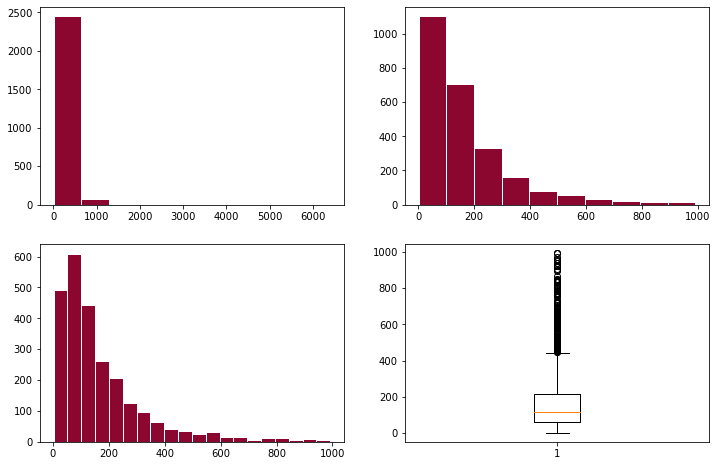

In [31]:
fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0,0].hist(ted.comments,edgecolor='white', color='#8B072F')

ax[0,1].hist(ted[ted.comments<1000].comments, 
            edgecolor='white', color='#8B072F')

ax[1,0].hist(ted[ted.comments<1000].comments, bins=20, 
             edgecolor='white', color='#8B072F')

ax[1,1].boxplot(ted[ted.comments<1000].comments)

### Plot the number of talks that took place each year

In [32]:
# dataset documentation for film_date says "Unix timestamp of the filming"
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [33]:
# results don't look right
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

In [34]:
# now the results look right
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [35]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

# verify that event name matches film_datetime for a random sample
ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
234,TED2008,2008-03-03
1179,TEDxPortofSpain,2011-11-11
1789,TED2014,2014-03-17
1705,TED2014,2014-03-20
373,TED2003,2003-02-02


In [36]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date        datetime64[ns]
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [37]:
# datetime columns have convenient attributes under the dt namespace
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [38]:
ted.film_datetime.dt.strftime('%Y').value_counts().sort_index()

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: film_datetime, dtype: int64

<ipython-input-39-3fafbce36dbb>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_per_year.index, rotation=45)


[Text(0, 0, '1972'),
 Text(1, 0, '1983'),
 Text(2, 0, '1984'),
 Text(3, 0, '1990'),
 Text(4, 0, '1991'),
 Text(5, 0, '1994'),
 Text(6, 0, '1998'),
 Text(7, 0, '2001'),
 Text(8, 0, '2002'),
 Text(9, 0, '2003'),
 Text(10, 0, '2004'),
 Text(11, 0, '2005'),
 Text(12, 0, '2006'),
 Text(13, 0, '2007'),
 Text(14, 0, '2008'),
 Text(15, 0, '2009'),
 Text(16, 0, '2010'),
 Text(17, 0, '2011'),
 Text(18, 0, '2012'),
 Text(19, 0, '2013'),
 Text(20, 0, '2014'),
 Text(21, 0, '2015'),
 Text(22, 0, '2016'),
 Text(23, 0, '2017')]

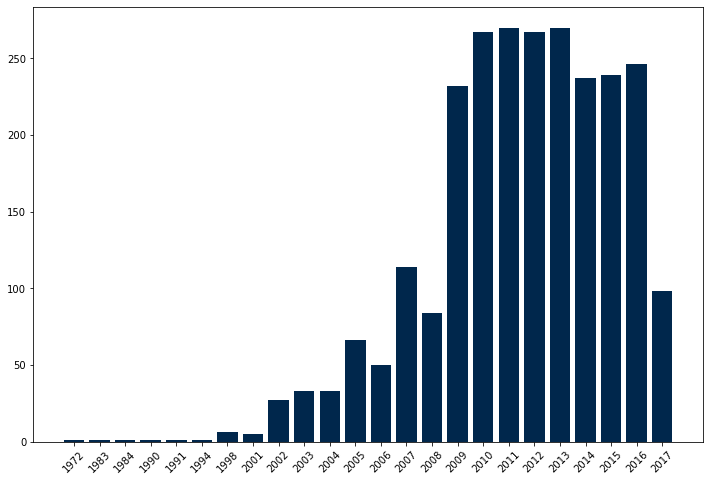

In [39]:
fig, ax=plt.subplots(figsize=(12,8))
event_per_year=ted.film_datetime.dt.strftime('%Y').value_counts().sort_index()
ax.bar(event_per_year.index, event_per_year, color='#00274C')
ax.set_xticklabels(event_per_year.index, rotation=45)

<ipython-input-40-91088337494c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(event_per_year.index, rotation=45)


(0.0, 24.15)

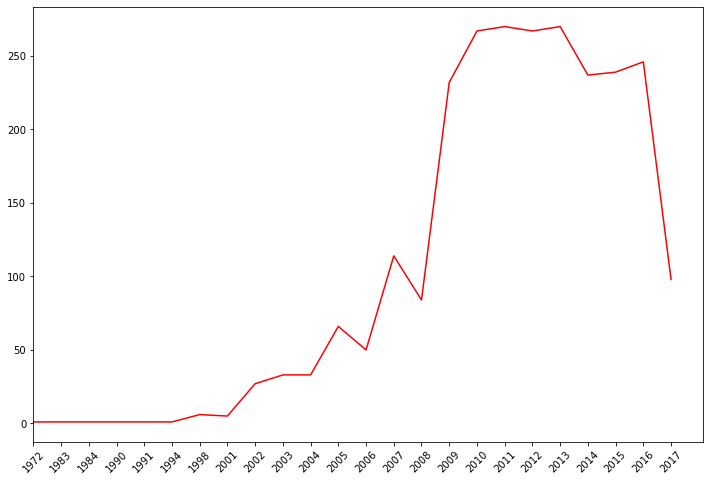

In [40]:
fig, ax=plt.subplots(figsize=(12,8))
event_per_year=ted.film_datetime.dt.strftime('%Y').value_counts().sort_index()
ax.plot(event_per_year.index, event_per_year, color='red', 
       linewidth=1.5)
ax.set_xticklabels(event_per_year.index, rotation=45)
ax.set_xlim(0)

In [41]:
# we only have partial data for 2017
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')